In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('/content/diabetes_prediction_dataset.csv')
print(data.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


Accuracy: 0.9591
Precision: 0.8615
Recall: 0.6180
F1 Score: 0.7197
ROC AUC: 0.9618


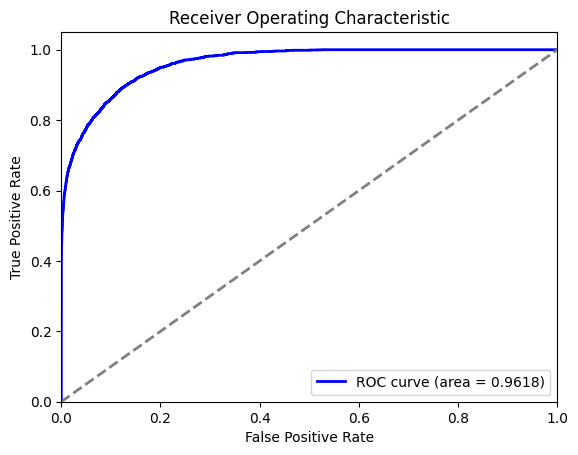

Cross-validated Accuracy: 0.9603
Cross-validated Precision: 0.8675
Cross-validated Recall: 0.6294
Cross-validated F1 Score: 0.7294
Cross-validated ROC AUC: 0.9618


In [3]:

# Check for categorical variables
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

# Apply one-hot encoding to categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Ensure there are no missing values
data_encoded = data_encoded.dropna()

# Split the data into features and target variable
# Replace 'target_column' with the actual name of your target column
X = data_encoded.drop('diabetes', axis=1)
y = data_encoded['diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Cross-validation
cv_accuracy = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()
cv_precision = cross_val_score(model, X, y, cv=10, scoring='precision').mean()
cv_recall = cross_val_score(model, X, y, cv=10, scoring='recall').mean()
cv_f1 = cross_val_score(model, X, y, cv=10, scoring='f1').mean()
cv_auc = cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean()

# Print cross-validation results
print(f'Cross-validated Accuracy: {cv_accuracy:.4f}')
print(f'Cross-validated Precision: {cv_precision:.4f}')
print(f'Cross-validated Recall: {cv_recall:.4f}')
print(f'Cross-validated F1 Score: {cv_f1:.4f}')
print(f'Cross-validated ROC AUC: {cv_auc:.4f}')



Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')
Correlation Matrix:
                     blood_glucose_level       age       bmi  hypertension
blood_glucose_level             1.000000  0.110672  0.091261      0.084429
age                             0.110672  1.000000  0.337396      0.251171
bmi                             0.091261  0.337396  1.000000      0.147666
hypertension                    0.084429  0.251171  0.147666      1.000000


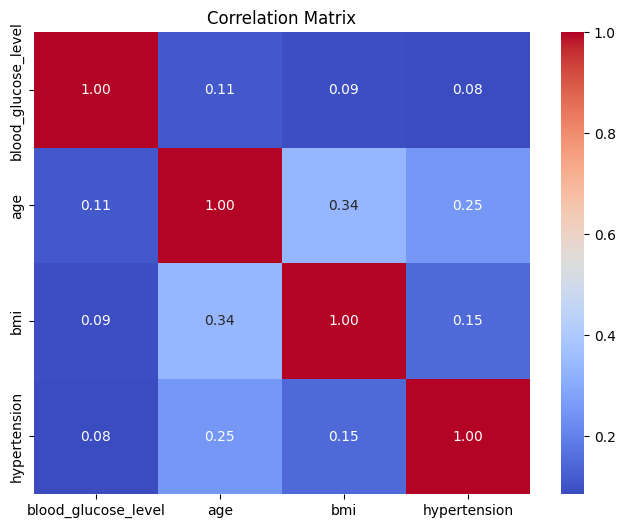

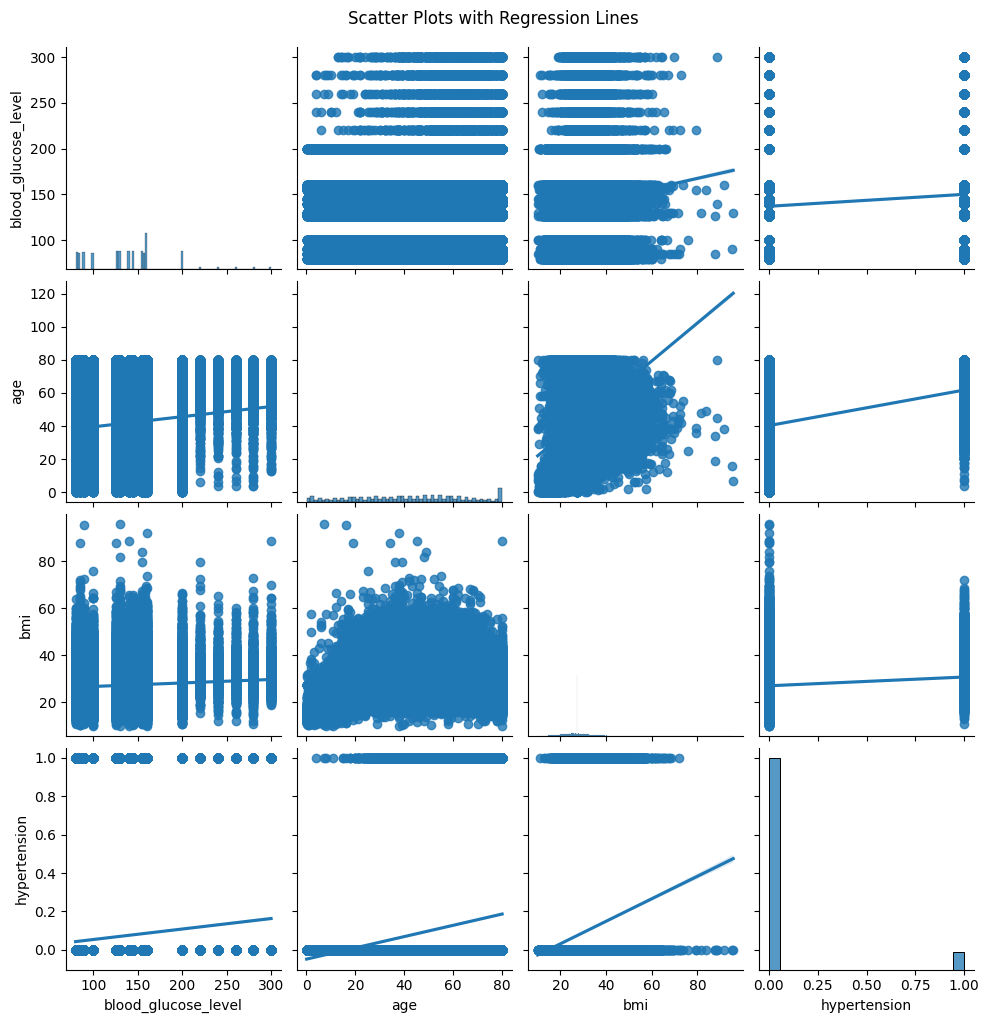

In [7]:
print(data.columns)

relevant_columns = ['blood_glucose_level', 'age', 'bmi', 'hypertension']
data_subset = data[relevant_columns]

# Calculate correlation coefficients
correlation_matrix = data_subset.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Plot correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Scatter plots with regression lines
sns.pairplot(data_subset, kind='reg')
plt.suptitle('Scatter Plots with Regression Lines', y=1.02)
plt.show()
